# Analize Data

Gorodetskaya et al. (2021) resalta la importancia de rolling mean

In [178]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [179]:
data = pd.read_csv('../data/aggregated_data_extra_metrics.csv')
data.head()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type,Weekday,Holiday Sequence,...,isWeekday,isPaymentDay,isPayweek,rolling_mean_weekday,rolling_max,lag_6,lag_7,rolling_max_weekday,rolling_std,rolling_mean
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0,No Holiday,FRIDAY,WHH,...,True,False,True,243020.0,364110.0,243020.0,243020.0,243020.0,182237.310761,160781.724138
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0,No Holiday,FRIDAY,WHH,...,True,False,True,265420.0,476500.0,265420.0,265420.0,265420.0,158371.404405,184831.379310
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0,No Holiday,FRIDAY,WHH,...,True,False,True,244340.0,244340.0,244340.0,244340.0,244340.0,22634.380928,182509.655172
3,2023-06-02,525,A,30110.0,8250.0,226470.0,248330.0,No Holiday,FRIDAY,WHH,...,True,False,True,8250.0,206430.0,8250.0,8250.0,8250.0,115841.744347,140405.517241
4,2023-06-02,302,A,70720.0,11760.0,350460.0,409420.0,No Holiday,FRIDAY,WHH,...,True,False,True,11760.0,343400.0,11760.0,11760.0,11760.0,189907.456497,165362.413793


In [180]:
atm_1 = data[data['codigo_cajero'] == 2]
atm_1.sort_values("fecha_transaccion")
print()

In [153]:
# # Create DataFrame
# data_rolling_mean = pd.DataFrame(data)

# # Convert 'fecha_transaccion' to datetime
# data_rolling_mean['fecha_transaccion'] = pd.to_datetime(data_rolling_mean['fecha_transaccion'])

# # Adding 'Year' column to differentiate weeks across years
# data_rolling_mean['Year'] = data_rolling_mean['fecha_transaccion'].dt.year

# # Adding 'Month' column to differentiate weeks across years
# data_rolling_mean['Month'] = data_rolling_mean['fecha_transaccion'].dt.month

# # Group by 'codigo_cajero' and 'Week', then calculate the maximum demand value for each week
# data_rolling_mean['rolling_mean'] = data_rolling_mean.groupby(['codigo_cajero', 'Weekday'])['demanda'].transform('mean')

# data_rolling_mean[['codigo_cajero', 'fecha_transaccion', 'Weekday', 'demanda', 'rolling_mean', 'Weekday']].loc[
#     (data_rolling_mean["codigo_cajero"] == 1) &
#     (data_rolling_mean["Month"] == 1)
#     ].head(30)

C:\Users\edurz\AppData\Local\Temp\ipykernel_10896\3256857799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_1['fecha_transaccion'] = pd.to_datetime(atm_1['fecha_transaccion'])


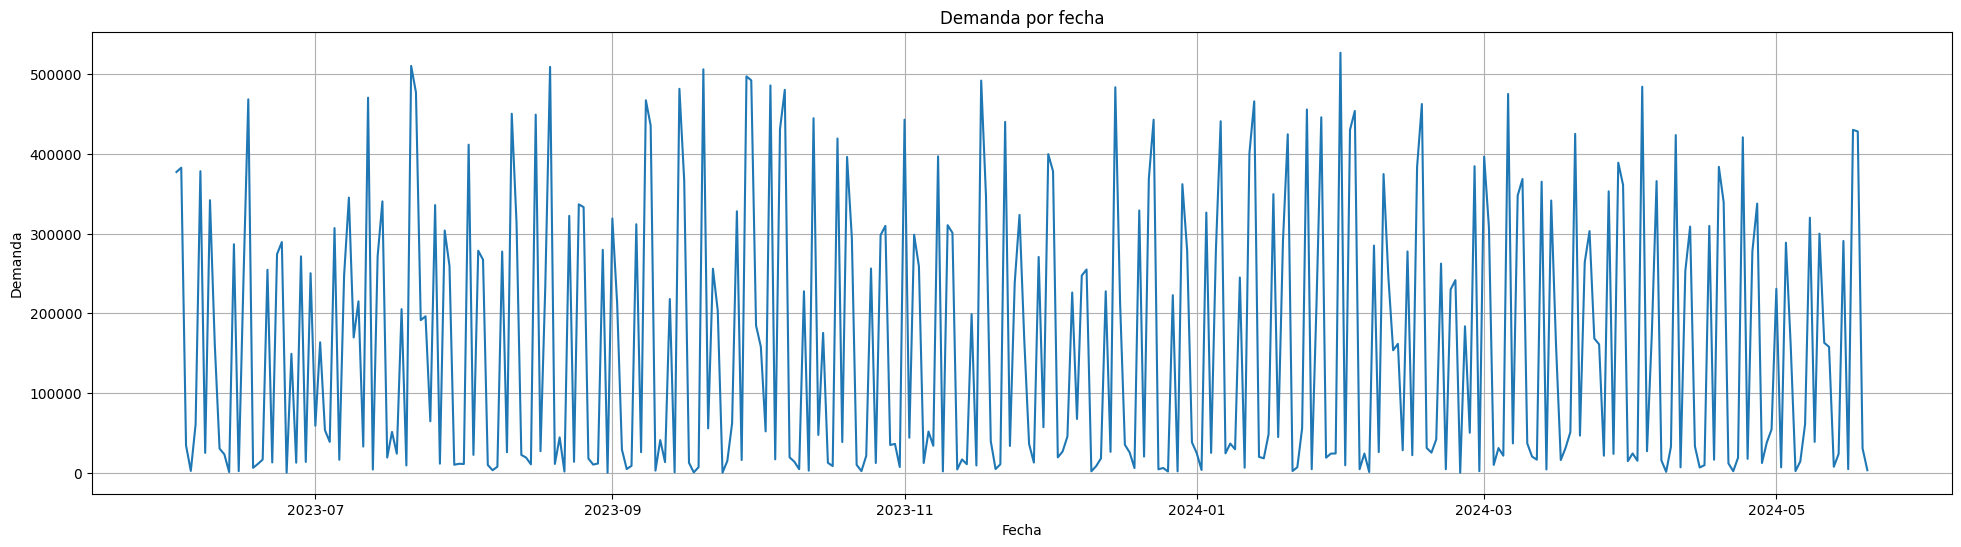

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# convertir la columna fecha a datetime
atm_1['fecha_transaccion'] = pd.to_datetime(atm_1['fecha_transaccion'])

# crear la gráfica
plt.figure(figsize=(24,6))
plt.plot(atm_1['fecha_transaccion'], atm_1['demanda'])
plt.title('Demanda por fecha')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.grid(True)
plt.show()

In [128]:
data['demanda'].min()

-0.0

In [69]:
data.columns

Index(['fecha_transaccion', 'codigo_cajero', 'tipo_cajero', 'saldo_inicial',
       'demanda', 'abastecimiento', 'saldo_final', 'Type', 'Weekday',
       'Holiday Sequence', 'isYesterdayHoliday', 'isHoliday',
       'isTomorrowHoliday', 'isYesterdayWeekday', 'isTomorrowWeekday',
       'isWeekday', 'isPaymentDay', 'isPayweek', 'rolling_mean_weekday',
       'rolling_max', 'lag_6', 'lag_7', 'rolling_max_weekday', 'rolling_std',
       'rolling_mean'],
      dtype='object')

<Axes: >

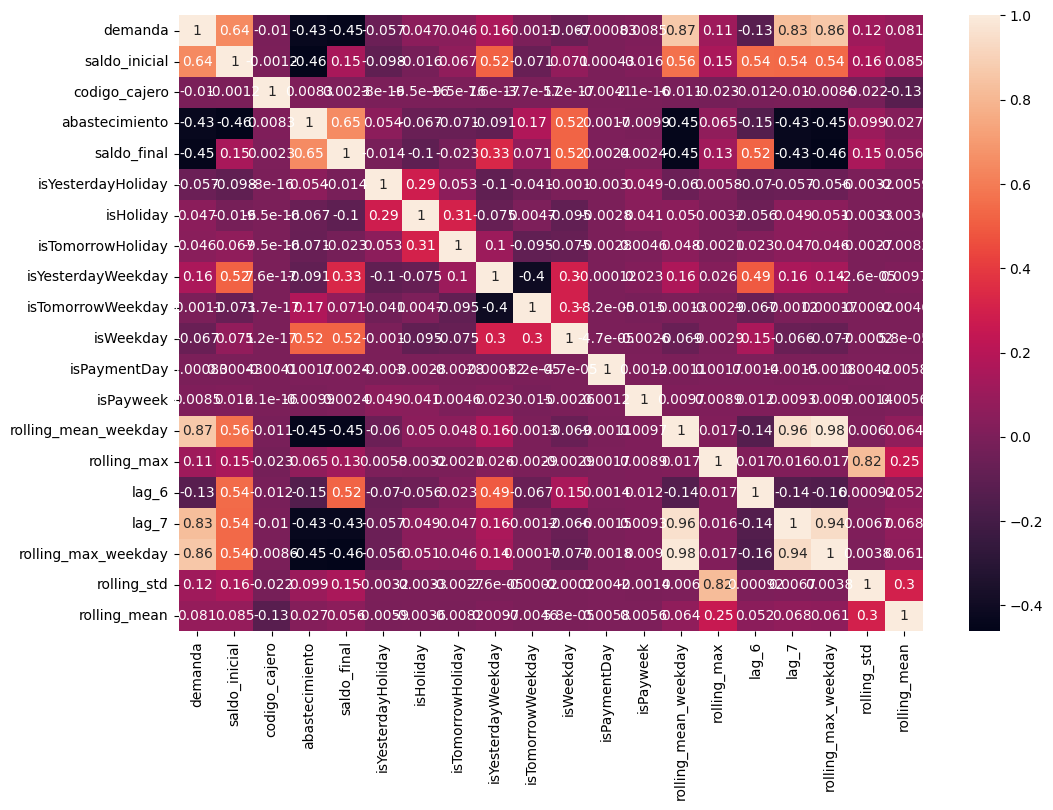

In [192]:
# data['demanda_shifted'] = data['demanda'].shift(-7)

colums_cat = ['tipo_cajero', 'Weekday', 'Holiday Sequence']

# Medir weekday y type
columns_num = ['demanda', 'saldo_inicial', 'codigo_cajero'
       , 'abastecimiento', 'saldo_final',
       'isYesterdayHoliday', 'isHoliday',
       'isTomorrowHoliday', 'isYesterdayWeekday', 'isTomorrowWeekday',
       'isWeekday', 'isPaymentDay', 'isPayweek', 'rolling_mean_weekday',
       'rolling_max', 'lag_6', 'lag_7', 'rolling_max_weekday', 'rolling_std',
       'rolling_mean']

corr_atm_df = data[columns_num]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_atm_df.corr(), annot=True)

In [193]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder
import pandas as pd

# Load your data here
# data = pd.read_csv('your_dataset.csv')

# Defining target and features
target = 'demanda'
categorical_columns = ['Weekday', 'Holiday Sequence', 'tipo_cajero'] # 'ATM Name'

# Initialize the target encoder
encoder = TargetEncoder(cols=categorical_columns)

# Apply KFold for cross-validation to ensure target encoding avoids data leakage
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform target encoding
data_encoded = data.copy()  # copy the cleaned data
data_encoded[categorical_columns] = 0  # Initialize to store encoded values

for train_index, test_index in kf.split(corr_atm_df):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    # Fit the encoder on the training data only
    encoder.fit(train_data[categorical_columns], train_data[target])
    
    # Transform the test data and store it back in the encoded data
    data_encoded.iloc[test_index, data_encoded.columns.get_indexer(categorical_columns)] = encoder.transform(test_data[categorical_columns])

# Check the first few rows of the encoded data
print(data_encoded.head())


C:\Users\edurz\AppData\Local\Temp\ipykernel_10896\2555689916.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[171401.34628148 171401.34628148 171401.34628148 ...  37830.74393493
  37830.74393493  37830.74393493]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_encoded.iloc[test_index, data_encoded.columns.get_indexer(categorical_columns)] = encoder.transform(test_data[categorical_columns])
C:\Users\edurz\AppData\Local\Temp\ipykernel_10896\2555689916.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[183521.08319971 183521.08319971 183521.08319971 ... 160979.30827709
 160979.30827709 160979.30827709]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_encoded.iloc[test_index, data_encoded.columns.get_indexer(categorical_columns)

  fecha_transaccion  codigo_cajero    tipo_cajero  saldo_inicial   demanda  \
0        2023-06-02              6  165498.529436       644690.0  243020.0   
1        2023-06-02             32  165498.529436       775480.0  265420.0   
2        2023-06-02            116  165588.583445       668240.0  244340.0   
3        2023-06-02            525  161371.719069        30110.0    8250.0   
4        2023-06-02            302  161763.016634        70720.0   11760.0   

   abastecimiento  saldo_final        Type        Weekday  Holiday Sequence  \
0             0.0     401670.0  No Holiday  172199.917121     182652.735714   
1             0.0     510060.0  No Holiday  172199.917121     182652.735714   
2             0.0     423900.0  No Holiday  171455.026676     182824.071480   
3        226470.0     248330.0  No Holiday  171444.037185     181964.932215   
4        350460.0     409420.0  No Holiday  171401.346281     183521.083200   

   ...  isPaymentDay  isPayweek  rolling_mean_weekday  r

In [194]:
data_encoded['dif_saldo'] =  data_encoded['saldo_final'] - data_encoded['saldo_inicial']


final_columns_num = ['fecha_transaccion', 'demanda', 'codigo_cajero', 'saldo_inicial', 'saldo_final', 'isYesterdayWeekday', 'rolling_mean_weekday', \
                     'lag_7', 'Weekday', 'Holiday Sequence', 'tipo_cajero', 'dif_saldo']

corr_atm_df = data_encoded[final_columns_num]

<Axes: >

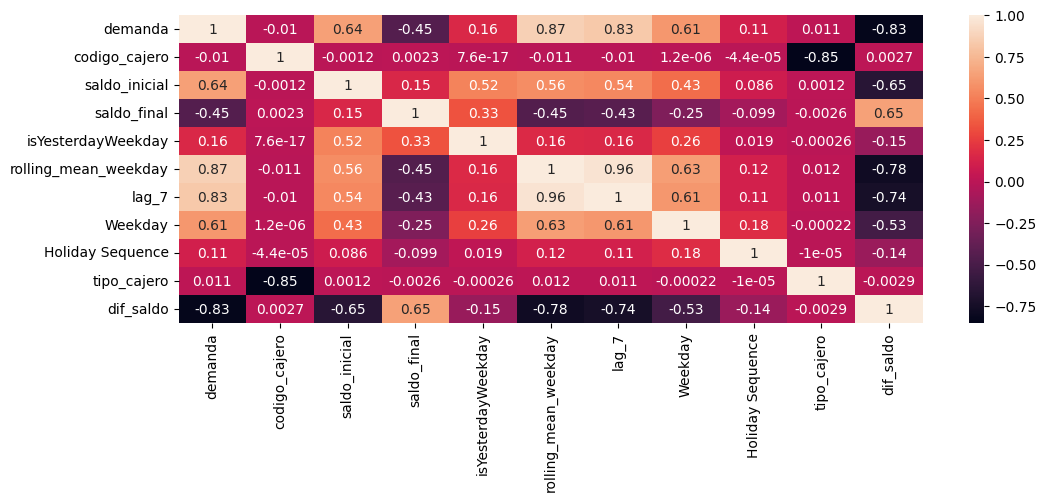

In [195]:
plt.figure(figsize=(12, 4))
sns.heatmap(corr_atm_df.drop(columns=['fecha_transaccion']).corr(), annot=True)

In [190]:
# corr_atm_df = corr_atm_df.drop(columns=['tipo_cajero', 'Holiday Sequence'])

In [196]:
corr_atm_df.to_csv('../data/aggregated_data_selection.csv', index=False)

## Por tipo de cajero

In [74]:
data_b = data.loc[(data["tipo_cajero"] == "B")]

In [75]:
data_b

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type,Weekday,Holiday Sequence,...,isWeekday,isPaymentDay,isPayweek,rolling_mean_weekday,rolling_max,lag_6,lag_7,rolling_max_weekday,rolling_std,rolling_mean
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0,No Holiday,FRIDAY,WHH,...,True,False,True,243020.0,364110.0,243020.000000,243020.0,243020.0,84920.760865,175105.205255
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0,No Holiday,FRIDAY,WHH,...,True,False,True,265420.0,476500.0,265420.000000,265420.0,265420.0,147766.511667,212680.426929
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0,No Holiday,FRIDAY,WHH,...,True,False,True,244340.0,244340.0,244340.000000,244340.0,244340.0,22634.380928,202427.438424
8,2023-06-02,215,B,779790.0,294990.0,0.0,484800.0,No Holiday,FRIDAY,WHH,...,True,False,True,294990.0,472890.0,294990.000000,294990.0,294990.0,115780.200380,216464.039409
12,2023-06-02,37,B,674170.0,353990.0,0.0,320180.0,No Holiday,FRIDAY,WHH,...,True,False,True,353990.0,353990.0,353990.000000,353990.0,353990.0,161530.574918,192529.507389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247794,2024-05-20,19,B,84590.0,33370.0,384370.0,435590.0,No Holiday,MONDAY,WWW,...,True,True,False,44225.0,33370.0,122590.000000,32450.0,56000.0,169738.387660,163188.000000
247795,2024-05-20,9,B,46520.0,3110.0,284460.0,327870.0,No Holiday,MONDAY,WWW,...,True,False,False,26925.0,3110.0,144065.714286,17610.0,36240.0,169738.387660,193680.428571
247796,2024-05-20,7,B,200000.0,177790.0,320570.0,342780.0,No Holiday,MONDAY,WWW,...,True,False,False,22585.0,177790.0,115548.571429,9970.0,35200.0,169738.387660,194834.571429
247798,2024-05-20,29,B,60450.0,32390.0,495230.0,523290.0,No Holiday,MONDAY,WWW,...,True,False,False,13150.0,32390.0,15450.000000,24720.0,24720.0,169738.387660,178008.785714


In [200]:
flotantes = [[3.14159, 2.71828, 3.14159, 2.71828, 3.14159, 2.71828, 3.14159],
             [1.61803, 0.57735, 1.61803, 0.57735, 1.61803, 0.57735, 1.61803],
             [1.61803, 0.57735, 1.61803, 0.57735, 1.61803, 0.57735, 1.61803]] 
redondeados = [[round(i, 0) for i in x] for x in flotantes]
print(redondeados)
# Salida: [[3.14, 2.72], [1.62, 0.58]]

[[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0]]
